# PISA Data Exploration
## by Zora Schärer

## Preliminary Wrangling

This document explores the PISA study of 2012 with data of about 485.000 students of 68 countries around the world. The variables represent information about the students and their attitudes, their school performance, their background and their schools.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [6]:
# load subst of data
start = time.time()
df_pisa = pd.read_csv('PISA2012.csv', encoding='latin-1', index_col=0, dtype='unicode')
end = time.time()
print('Elapsed time: {} minutes'.format((end-start)/60))

Elapsed time: 3.329553318023682 minutes


In [9]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: object(635)
memory usage: 2.3+ GB


In [10]:
df_pisa.CNT.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: CNT, Length: 68, dtype: int64

In [13]:
# create a subset of the data for analysis (see explanation below)
pisa_explore = df_pisa[['PV1MATH','PV1READ','PV1SCIE','ST04Q01','GRADE','ATSCHL','BELONG','PERSEV','OPENPS',
         'ESCS','HISCED','WEALTH','CNT','DISCLIMA','ICTSCH','STUDREL','LMINS','MMINS','SMINS']]
pisa_explore.rename(columns = {'PV1MATH':'math_pv', 'PV1READ':'reading_pv', 'PV1SCIE':'science_pv',
                              'ST04Q01':'gender', 'GRADE':'grade', 'ATSCHL':'attitude_school',
                              'BELONG':'belonging_school', 'PERSEV':'perseverance', 'OPENPS':'problem_solving',
                              'ESCS':'status', 'HISCED':'parents_edu', 'WEALTH':'wealth',
                              'CNT':'country', 'DISCLIMA':'discipl_climate', 'ICTSCH':'ICT_school',
                              'STUDREL':'teacher_student_rel', 'LMINS':'l_learning', 'MMINS':'m_learning',
                              'SMINS':'s_learning'}, inplace = True)
pisa_explore.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,math_pv,reading_pv,science_pv,gender,grade,attitude_school,belonging_school,perseverance,problem_solving,status,parents_edu,wealth,country,discipl_climate,ICT_school,teacher_student_rel,l_learning,m_learning,s_learning
1,406.8469,249.5762,341.7009,Female,0,-2.31,-1.18,-0.3407,0.0521,NaN,"ISCED 3A, ISCED 4",-2.92,Albania,1.85,NaN,-1.04,NaN,NaN,NaN
2,486.1427,406.2936,548.9929,Female,0,NaN,NaN,1.3116,-0.9492,NaN,"ISCED 5A, 6",0.69,Albania,NaN,NaN,NaN,315,270,90
3,533.2684,401.21,499.6643,Female,-1,NaN,NaN,0.9918,0.9383,NaN,"ISCED 5A, 6",-0.23,Albania,NaN,NaN,NaN,300,NaN,NaN
4,412.2215,547.363,438.6796,Female,-1,NaN,NaN,NaN,NaN,NaN,"ISCED 5A, 6",-1.17,Albania,1.8,NaN,NaN,135,135,90
5,381.9209,311.7707,361.5628,Female,-1,1.38,2.63,1.0819,1.2387,NaN,"ISCED 3A, ISCED 4",-1.17,Albania,-0.08,NaN,-0.02,NaN,NaN,NaN


In [14]:
pisa_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   math_pv              485490 non-null  object
 1   reading_pv           485490 non-null  object
 2   science_pv           485490 non-null  object
 3   gender               485490 non-null  object
 4   grade                484617 non-null  object
 5   attitude_school      312584 non-null  object
 6   belonging_school     313399 non-null  object
 7   perseverance         313172 non-null  object
 8   problem_solving      312766 non-null  object
 9   status               473648 non-null  object
 10  parents_edu          473091 non-null  object
 11  wealth               479597 non-null  object
 12  country              485490 non-null  object
 13  discipl_climate      314777 non-null  object
 14  ICT_school           297995 non-null  object
 15  teacher_student_rel  313860 non-nu

In [18]:
pisa_explore.describe()

,math_pv,reading_pv,science_pv,grade,attitude_school,belonging_school,perseverance,problem_solving,status,wealth,discipl_climate,ICT_school,teacher_student_rel,l_learning,m_learning,s_learning
count,485490.000000,485490.000000,485490.000000,484617.000000,312584.000000,313399.000000,313172.000000,312766.000000,473648.000000,479597.00000,314777.000000,297995.000000,313860.000000,282866.000000,283303.000000,270914.000000
mean,469.621653,472.004640,475.769824,-0.162964,0.051644,-0.022259,0.140125,0.038895,-0.265546,-0.33701,-0.002501,-0.065411,0.123262,219.276636,226.007056,211.122460
std,103.265391,102.505523,101.464426,0.655558,1.002942,0.983503,0.996012,0.998720,1.131791,1.21530,0.993017,1.048941,1.029343,97.997730,97.448421,131.368322
min,19.792800,0.083400,2.648300,-3.000000,-2.990000,-3.690000,-4.053000,-3.633300,-5.950000,-6.65000,-2.480000,-2.803800,-3.110000,0.000000,0.000000,0.000000
25%,395.318600,403.600700,404.457300,0.000000,-0.640000,-0.740000,-0.340700,-0.543300,-1.000000,-1.04000,-0.710000,-0.753800,-0.480000,165.000000,180.000000,120.000000
50%,466.201900,475.455000,475.699400,0.000000,-0.240000,-0.150000,0.051100,0.052100,-0.190000,-0.30000,-0.080000,-0.083600,-0.020000,200.000000,220.000000,180.000000
75%,541.057800,544.502500,547.780700,0.000000,0.770000,0.560000,0.479500,0.463900,0.610000,0.43000,0.810000,0.542300,0.810000,250.000000,250.000000,270.000000
max,962.229300,904.802600,903.338300,3.000000,2.350000,2.630000,3.528600,2.446500,3.690000,3.25000,1.850000,2.826100,2.160000,2400.000000,3000.000000,2975.000000


In [16]:
pisa_explore.to_csv('pisa_explore.csv', index = False)

In [17]:
pisa_explore = pd.read_csv('pisa_explore.csv')

### What is the structure of your dataset?

The chosen subset of the data has 100.000 students and 635 variables collected in 2012. The first part of the variables hold the raw answers to student questionnaire. The second part of the variables are so called indices, derived from the questionnaire answers (see https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf). The last part are the plausible values and student weights. For each area (mathematics, reading, science), there are five plausible values (PVs). "For [a] given area all five values PV1- PV5 are just independent estimations of the student performance in [that] given area. For exploration it is fine to use only PV1." (http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm)

### What is/are the main feature(s) of interest in your dataset?

I will use the first PV of each of the three areas as the dependent variables (PV1MATH, PV1READ, PV1SCIE). I am most interested to find out what variables affect these measures for the students' performance. I renamed these variables to `math_pv`, `reading_pv`, `science_pv`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

After looking through the PISA data dictionary and the [PISA Technical Report](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf), I chose to use the indices listed below as independent variables and explore their relationship with the PVs and with each other. To make the data handling easier, I created a new data frame with only these variables: `pisa_explore`. I re-named the variables as shown in parentheses in the list below.
* Student characteristics
    * ST04Q01	Gender (`gender`)
    * GRADE	    Grade compared to modal grade in country (`rel_grade`)
    * ATSCHL	Attitude towards School: Learning Outcomes (`attitude_school`))
    * BELONG	Sense of Belonging to School (`belonging_school`)
    * PERSEV	Perseverance (`perseverance`)
    * OPENPS	Openness for Problem Solving (`problem_solving`)
* Social/family background
    * ESCS	    Index of economic, social and cultural status (`status`)
    * HISCED	Highest educational level of parents (`parents_edu`)
    * WEALTH	Wealth (`wealth`)
* School characteristics
    * CNT	    Country code 3-character (`country`)
    * DISCLIMA	Disciplinary Climate (`discipl_climate`)
    * ICTSCH	ICT Availability at School (`ICT_school`)
    * STUDREL	Teacher Student Relations (`teacher_student_rel`)
    * LMINS	    Learning time (minutes per week) -  Language (`l_learning`)
    * MMINS	    Learning time (minutes per week) - Mathematics (`m_learning`)
    * SMINS	    Learning time (minutes per week) - Science (`s_learning`)



## Univariate Exploration

In [21]:
# Define function for plotting histograms with reasonable bin size
def plot_hist(x, bin_size):
    b = np.arange(min(x),max(x)+bin_size, bin_size)
    plt.hist(x, bins = b);
    plt.ylabel('Count');

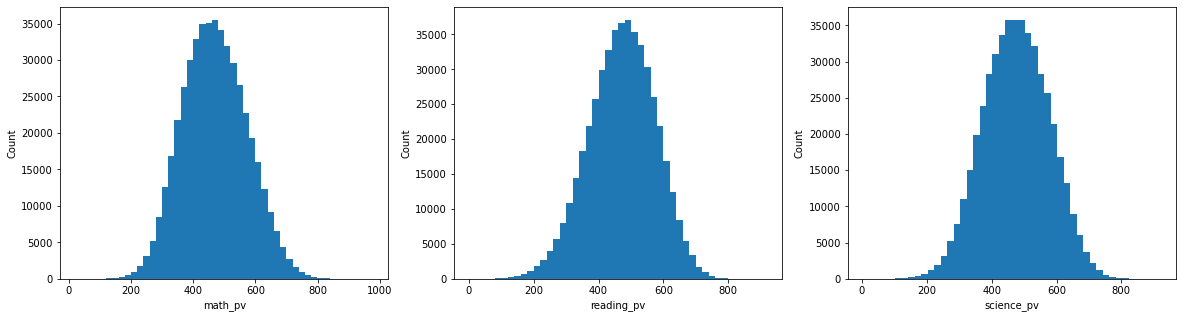

In [24]:
plt.figure(figsize = [20, 5])
# math_pv
plt.subplot(1,3,1)
plot_hist(pisa_explore.math_pv, 20)
plt.xlabel('math_pv');
# reading_pv
plt.subplot(1,3,2)
plot_hist(pisa_explore.reading_pv, 20)
plt.xlabel('reading_pv');
# science_pv
plt.subplot(1,3,3)
plot_hist(pisa_explore.science_pv, 20)
plt.xlabel('science_pv');

The histograms of the dependent variables shown above reveal that they are all normally distributed and have very similar ranges. The slope to the upper extreme values is slightly steeper than the slope to the lower extremes, i.e. there are slightly more students with very low performance in the examinated areas.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!